# Mini Proyecto 2 - Aprendizaje Supervisado
## Implementación y visualización de k-means en 2D
### Importado de Librerias

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering as AC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture as GMM
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import cdist
import seaborn as sns; sns.set()
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal as mvn

2022-09-05 19:49:27.510232: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-05 19:49:27.510247: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Carga de datos
Archivo utilizado: `kmeans.csv`

In [3]:
dt_kmeans1 = pd.read_csv('kmeans1.csv')
dt_kmeans1 = ((dt_kmeans1-dt_kmeans1.min())/(dt_kmeans1.max()-dt_kmeans1.min()))
dt_kmeans1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       400 non-null    float64
 1   B       400 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


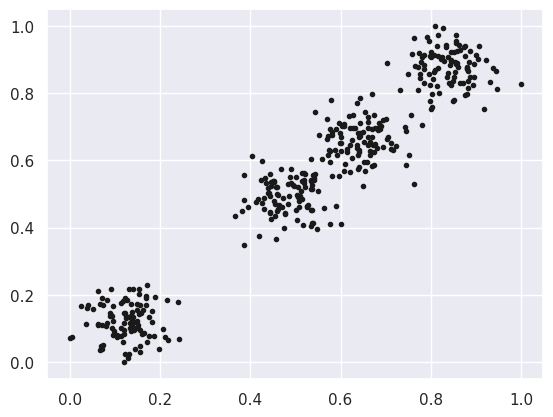

In [4]:
plt.plot(dt_kmeans1['A'], dt_kmeans1['B'], 'k.')
plt.show()

### Al graficar los datos cargados desde `kmeans1.csv` se puede apreciar que se forman 4 grupos diferentes de datos.  

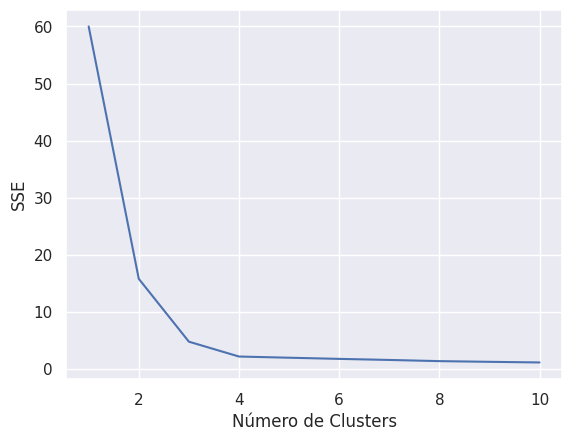

In [5]:
scores = dict()
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, max_iter=1000).fit(dt_kmeans1)
  scores.update({i: kmeans.inertia_})

plt.figure()
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel("Número de Clusters")
plt.ylabel("SSE")
plt.show()

### Dado el grafico de clusters/inertia, se aprecia el el número de clusters ideal es de 4

In [6]:
_kmeans1 = KMeans(n_clusters=4, max_iter=1000)
_kmeans1.fit(dt_kmeans1)

KMeans(max_iter=1000, n_clusters=4)

Outputs disponibles

In [7]:
print(_kmeans1.cluster_centers_, _kmeans1.inertia_)
print(_kmeans1.labels_)

[[0.12488096 0.1225848 ]
 [0.64504777 0.66137917]
 [0.48395258 0.49330798]
 [0.83902637 0.87789952]] 2.176114977897748
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


Se realizará una comparación usando 3 clusters y 4 clusters.

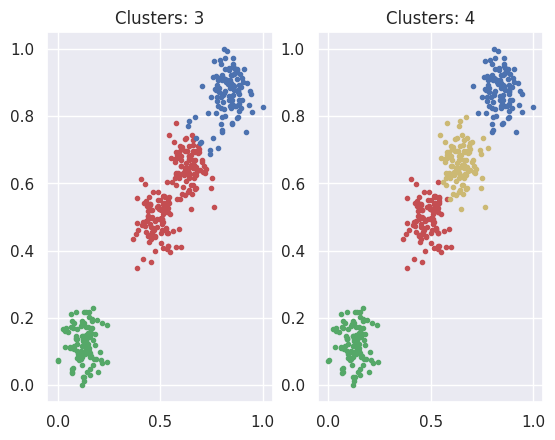

In [8]:
_kmeans1_n3, _kmeans1_n4 = KMeans(n_clusters=3, max_iter=1000), KMeans(n_clusters=4, max_iter=1000)
_kmeans1_n3.fit(dt_kmeans1), _kmeans1_n4.fit(dt_kmeans1)
dt_kmeans1['labels_0'] = _kmeans1_n3.labels_
dt_kmeans1['labels_1'] = _kmeans1_n4.labels_
colors = ['r.', 'g.', 'b.', 'y.']
fig, axs = plt.subplots(1, 2)

for ax in range(len(axs)):
  for i in range(0,4):
    axs[ax].plot(dt_kmeans1['A'][dt_kmeans1[f'labels_{ax}']==i], dt_kmeans1['B'][dt_kmeans1[f'labels_{ax}']==i], colors[i])

axs[0].set_title('Clusters: 3')
axs[1].set_title('Clusters: 4')
plt.show()

Se puede obserbar que al utilizar al utilizar 3 clusters solo se identifican 3 grupos. En cambio al utilizar 4 clusters se logra correctamete identificar los 4 grupos que se visualizaron al principio.

## Análisis de clusters
### Carga de datos
Archivo utilizado: `kmeans2.csv`

In [9]:
dt_kmeans2 = pd.read_csv('kmeans2.csv')
dt_kmeans2 = ((dt_kmeans2-dt_kmeans2.min())/(dt_kmeans2.max()-dt_kmeans2.min()))
dt_kmeans2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5000 non-null   float64
 1   Amplitude         5000 non-null   float64
 2   AndersonDarling   5000 non-null   float64
 3   Autocor_length    5000 non-null   float64
 4   Beyond1Std        5000 non-null   float64
 5   Gskew             5000 non-null   float64
 6   LinearTrend       5000 non-null   float64
 7   MaxSlope          5000 non-null   float64
 8   Mean              5000 non-null   float64
 9   Meanvariance      5000 non-null   float64
 10  MedianAbsDev      5000 non-null   float64
 11  MedianBRP         5000 non-null   float64
 12  PercentAmplitude  5000 non-null   float64
 13  PeriodLS          5000 non-null   float64
dtypes: float64(14)
memory usage: 547.0 KB


### Aplicar K-Means
Preprocesar los datos

In [10]:
norm = StandardScaler()
dt_kmeans2_std = norm.fit_transform(dt_kmeans2)
dt_kmeans2_std.shape

(5000, 14)

Reducción de Dimensionalidad ya que la base posee muchos descriptores

In [11]:
pca = PCA(n_components=2)
dt_kmeans2_std_trans = pca.fit_transform(dt_kmeans2_std)
dt_kmeans2_std_trans = pd.DataFrame(dt_kmeans2_std_trans, columns=['A', 'B'])

Obtención del número de clusters ideal

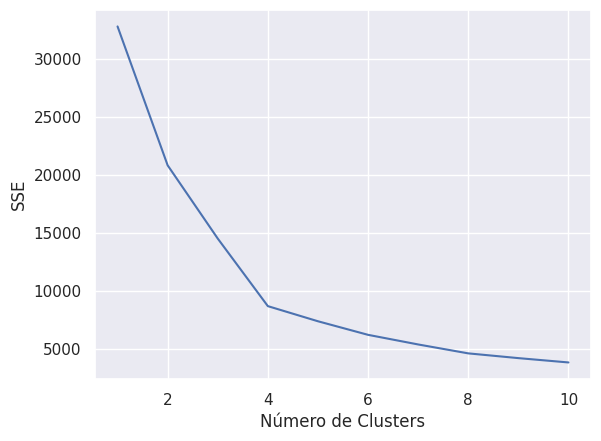

In [12]:
scores2 = dict()
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, max_iter=1000).fit(dt_kmeans2_std_trans)
  scores2.update({i: kmeans.inertia_})
plt.figure()
plt.plot(list(scores2.keys()), list(scores2.values()))
plt.xlabel("Número de Clusters")
plt.ylabel("SSE")
plt.show()

El número de clusters se obtiene con el metodo utilizado anteriormente, en este caso, tambien coincide con 4

In [13]:
_kmeans2 = KMeans(n_clusters=4, max_iter=1000)
_kmeans2.fit(dt_kmeans2_std_trans)
print(f"Centroides:\n{_kmeans2.cluster_centers_}", f"\nSumatoria: \n{_kmeans1.inertia_}")
print(f"Etiquetas:\n{_kmeans2.labels_}")

Centroides:
[[-0.97130019 -0.13673027]
 [12.88994365 -2.04611815]
 [ 1.86183698 -0.98127165]
 [ 1.57240967  3.76036746]] 
Sumatoria: 
2.176114977897748
Etiquetas:
[0 2 3 ... 0 0 0]


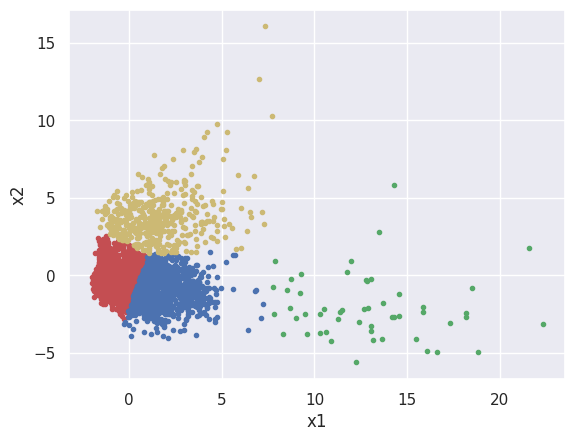

In [14]:
dt_kmeans2_std_trans['labels'] = _kmeans2.labels_
for i in range(0,4):
  plt.plot(
    dt_kmeans2_std_trans['A'][dt_kmeans2_std_trans['labels']==i],
    dt_kmeans2_std_trans['B'][dt_kmeans2_std_trans['labels']==i],
    colors[i]
  )
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

### Clustering Jerárquico - Dendograma

Se utilizará la función provista por el profesor para graficar el Dendograma solicitado

In [15]:
def plot_dendrogram(model, **kwargs):
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count

  linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
  dendrogram(linkage_matrix, **kwargs)

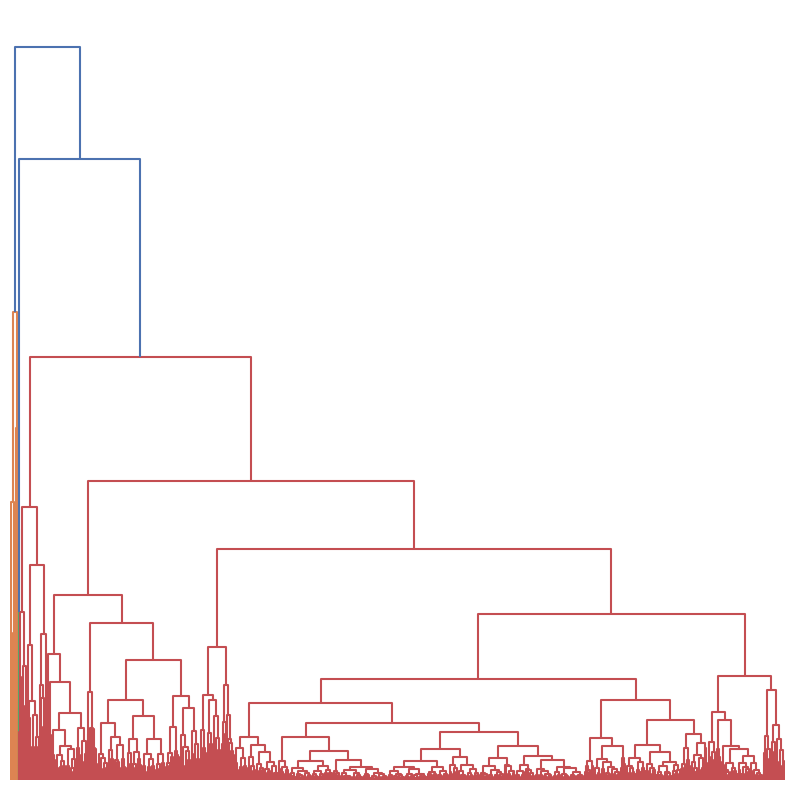

In [19]:

ac = AC(n_clusters=None, affinity='euclidean', linkage = 'complete', distance_threshold=0.0)
tmp = dt_kmeans2_std_trans.drop(columns=['labels'])
ac.fit(tmp)
plt.figure(figsize=(10,10))
plt.box(False)
plt.axis('off')
plot_dendrogram(ac,**{'labels': ac.labels_})

### GMM Visualizaciones y Métricas adecuadas

Se utilizaran las funciones provistas por el material proporcionado en el curso

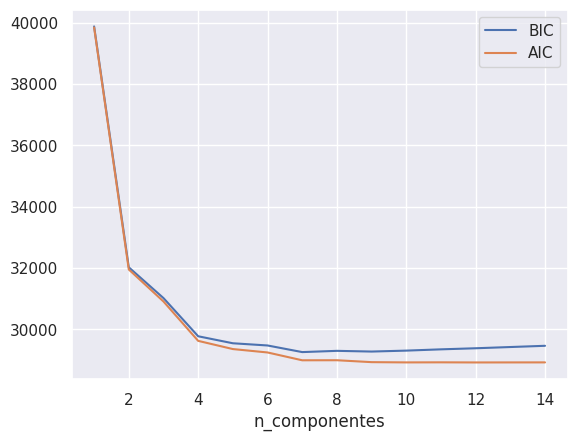

In [20]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
  ax = ax or plt.gca()
  if covariance.shape == (2, 2):
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)
  else:
    angle = 0
    width, height = 2 * np.sqrt(covariance)
  for nsig in range(1, 4):
    ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                        angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
  ax = ax or plt.gca()
  labels = gmm.fit(X).predict(X)
  if label:
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2,alpha=0.1)
  else:
    ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2, alpha=0.1)
  ax.axis('equal')
  
  w_factor = 0.2 / gmm.weights_.max()
  for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor)

n_componentes = np.arange(1,15)
modelos = [GMM(n, covariance_type = 'full', random_state = 0).fit(tmp)
           for n in n_componentes]


plt.plot(n_componentes, [m.bic(tmp) for m in modelos], label = 'BIC')
plt.plot(n_componentes, [m.aic(tmp) for m in modelos], label = 'AIC')
plt.legend(loc='best')
plt.xlabel('n_componentes')
plt.show()

Se ajusta el modelo con el número de componentes que se obtienen a partir del gráfico anterior

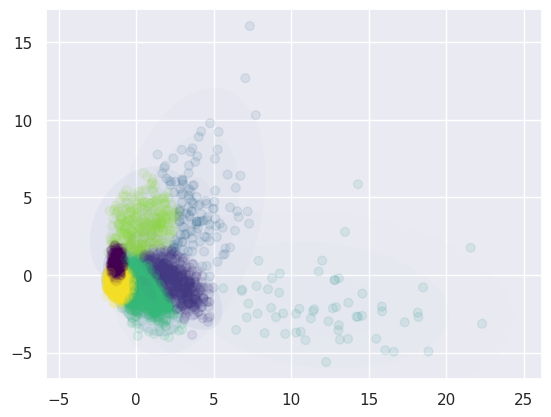

In [21]:

gmm = GMM(7, covariance_type = 'full', random_state = 0).fit(tmp)
plot_gmm(gmm, tmp.to_numpy())

In [22]:
centers = np.zeros(shape=(gmm.n_components, tmp.shape[1]))
for i in range(gmm.n_components):
  density = mvn(cov = gmm.covariances_[i], mean = gmm.means_[i]).pdf(tmp)
  print('---------------------')
  print('Gaussiana '+str(i))
  print('Medias')
  print(gmm.means_[i])
  print('Covarianza')
  print(gmm.covariances_[i])


---------------------
Gaussiana 0
Medias
[-1.22587258  0.23392805]
Covarianza
[[0.03440328 0.00537184]
 [0.00537184 0.30421284]]
---------------------
Gaussiana 1
Medias
[ 2.40795386 -0.35282168]
Covarianza
[[ 1.11000295 -0.6937073 ]
 [-0.6937073   1.13711641]]
---------------------
Gaussiana 2
Medias
[3.28942712 3.42127029]
Covarianza
[[2.82509716 1.62761621]
 [1.62761621 8.29325948]]
---------------------
Gaussiana 3
Medias
[11.83523634 -1.92933647]
Covarianza
[[17.31960046 -1.21849635]
 [-1.21849635  4.18728419]]
---------------------
Gaussiana 4
Medias
[ 0.45747982 -0.94604855]
Covarianza
[[ 0.75788545 -0.40410431]
 [-0.40410431  1.02672658]]
---------------------
Gaussiana 5
Medias
[0.45975225 3.07723814]
Covarianza
[[1.33212447 0.3483005 ]
 [0.3483005  1.72791456]]
---------------------
Gaussiana 6
Medias
[-1.02179763 -0.50905094]
Covarianza
[[ 0.1741067  -0.02941548]
 [-0.02941548  0.22260242]]
